## 2.1

The inputs of the left population are : $w_{L \to L}(x_{Li}, x_{Lj}) = \cos(x_{Li} + \theta - x_{Lj})$ and $w_{R \to L}(x_{Li}, x_{Rj}) = \cos(x_{Li} + \theta - x_{Rj})$

$I = J \left( \cos(x_{Li} + \theta) \sum_{j=1}^{N} \cos( x_{Lj}) S_{Lj}(t) + \sin(x_{Li} + \theta) \sum_{j=1}^{N} \sin(x_{Lj}) S_{Lj}(t) \right) + J \left( \cos(x_{Li} + \theta) \sum_{j=1}^{N} \cos(x_{Rj}) S_{Rj}(t) + \sin(x_{Li} + \theta) \sum_{j=1}^{N} \sin(x_{Rj}) S_{Rj}(t) \right)$

The inputs of the right population are : $w_{R \to R}(x_{Ri}, x_{Rj}) = \cos(x_{Ri} - \theta - x_{Rj})$ and $w_{L \to R}(x_{Ri}, x_{Lj}) = \cos(x_{Ri} - \theta - x_{Lj})$

$I = J \left( \cos(x_{Ri} - \theta) \sum_{j=1}^{N} \cos(x_{Rj}) S_{Rj}(t) + \sin(x_{Ri}- \theta) \sum_{j=1}^{N} \sin(x_{Rj}) S_{Rj}(t) \right) + J \left( \cos(x_{Ri} - \theta)) \sum_{j=1}^{N} \cos(x_{Lj}) S_{Lj}(t) + \sin(x_{Ri}- \theta) \sum_{j=1}^{N} \sin(x_{Lj}) S_{Lj}(t) \right)$



## 2.2

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from simulation import TwoPopulationSimulation,  bins_spike, get_theta_time_series
import constant as ct
from simulation import get_bump


In [2]:
# fix seed
np.random.seed(1)

100%|██████████| 9999/9999 [00:02<00:00, 4297.48it/s]


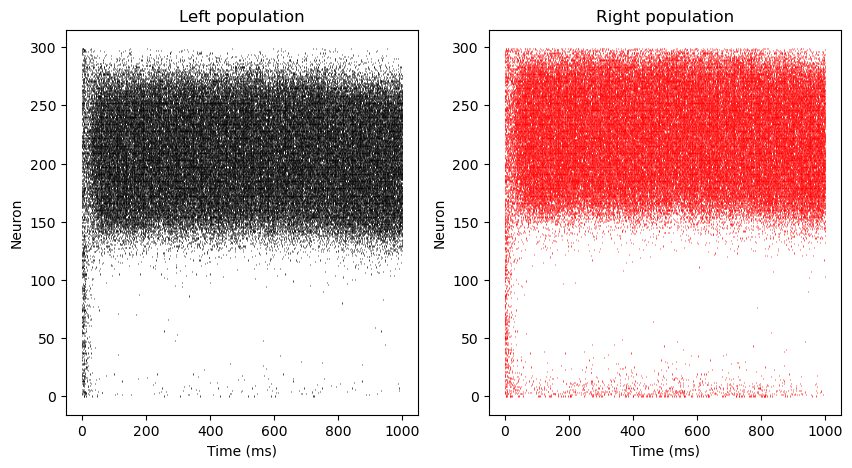

In [12]:
J = 3
theta = 10*np.pi/180

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

network = TwoPopulationSimulation(J = J, theta = theta)

hL,sL, hR, sR = network.simulation(initial_voltage=network.uniform_voltage)
sL1, sR1 = bins_spike(sL, 1), bins_spike(sR, 1)

spike_timesL = [np.where(sL1.T[i] !=0)[0] for i in range(ct.N)]
spike_timesR = [np.where(sR1.T[i] !=0)[0] for i in range(ct.N)]

ax[0].eventplot(spike_timesL, orientation='horizontal', color='black', linewidth=0.5)
ax[1].eventplot(spike_timesR, orientation='horizontal', color='red', linewidth=0.5)
ax[0].set_title(f'Left population')
ax[1].set_title(f'Right population')
ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')
ax[0].set_ylabel("Neuron")
ax[1].set_ylabel("Neuron")
plt.show()
    

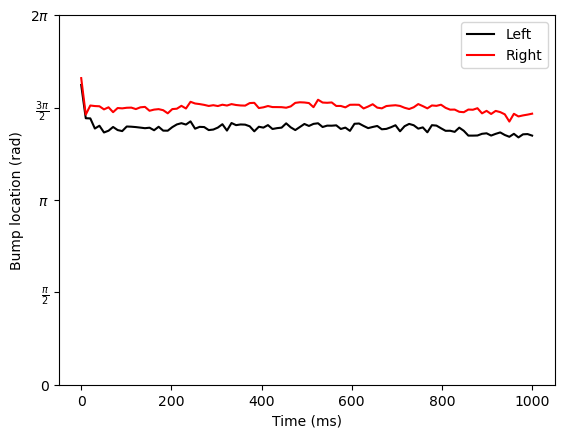

In [18]:
sL10 = bins_spike(sL, 10)
sR10 = bins_spike(sR, 10)


bump_locationL = get_bump(sL10, N = ct.N)
bump_locationR = get_bump(sR10, N = ct.N)

time = np.linspace(0, 1000, len(bump_locationL), endpoint=True)
plt.plot(time, bump_locationL, label='Left', color='black')
plt.plot(time, bump_locationR, label='Right', color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Bump location (rad)')
plt.yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.legend()
plt.show()

In [19]:
# we expect 20 because theta is 10°
print(np.abs(np.mean(bump_locationL)-np.mean(bump_locationR))/np.pi*180)

20.004698468091473


## 2.3

In [5]:
np.random.seed(1)

  0%|          | 26/9999 [00:00<00:38, 256.79it/s]

100%|██████████| 9999/9999 [00:29<00:00, 337.91it/s]


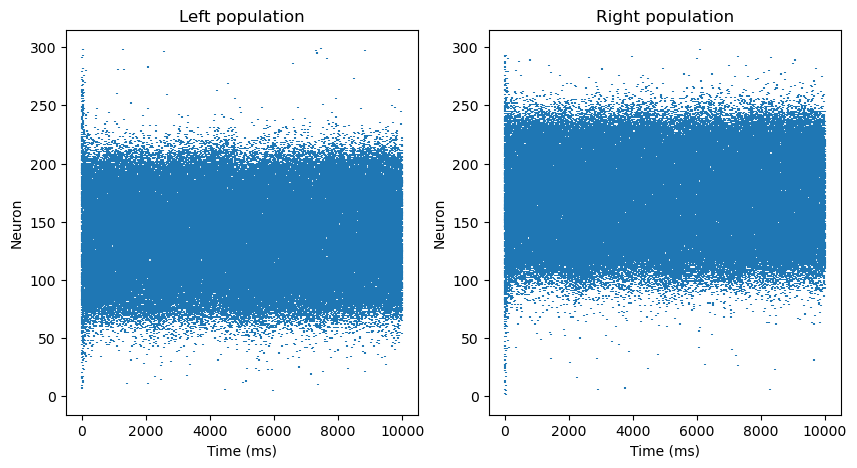

In [6]:
J = 3
theta = 20*np.pi/180

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

network = TwoPopulationSimulation(J = J, theta = theta)

hL,sL, hR, sR = network.simulation(initial_voltage=network.centered_voltage)

# s = bins_spike(s, 1)
spike_timesL = [np.where(sL.T[i] !=0)[0] for i in range(ct.N)]
spike_timesR = [np.where(sR.T[i] !=0)[0] for i in range(ct.N)]

ax[0].eventplot(spike_timesL, orientation='horizontal')
ax[1].eventplot(spike_timesR, orientation='horizontal')
ax[0].set_title(f'Left population')
ax[1].set_title(f'Right population')
ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')
ax[0].set_ylabel("Neuron")
ax[1].set_ylabel("Neuron")
plt.show()
    

In [7]:
sL = bins_spike(sL, 10)# what is the threshold ??
sR = bins_spike(sR, 10)

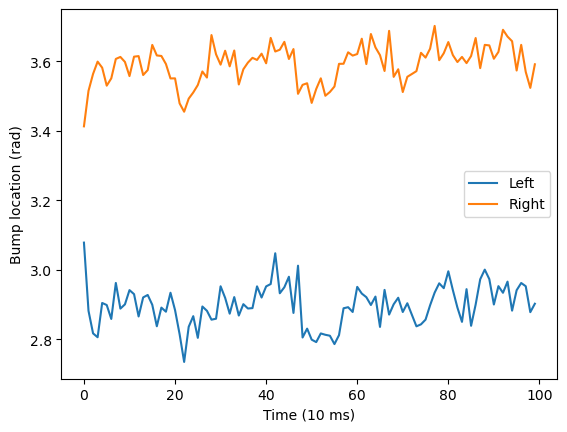

In [8]:
from simulation import get_bump
bump_locationR = get_bump(sR, N = ct.N)
bump_locationL = get_bump(sL, N = ct.N)
plt.plot(bump_locationL, label='Left')
plt.plot(bump_locationR, label='Right')
plt.xlabel('Time (10 ms)')
plt.ylabel('Bump location (rad)')
plt.legend()
plt.show()

## 2.4

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from simulation import TwoPopulationSimulation,  bins_spike, get_theta_time_series
import constant as ct
from simulation import get_bump


100%|██████████| 9999/9999 [00:02<00:00, 4433.23it/s]
3it [00:11,  3.80s/it]


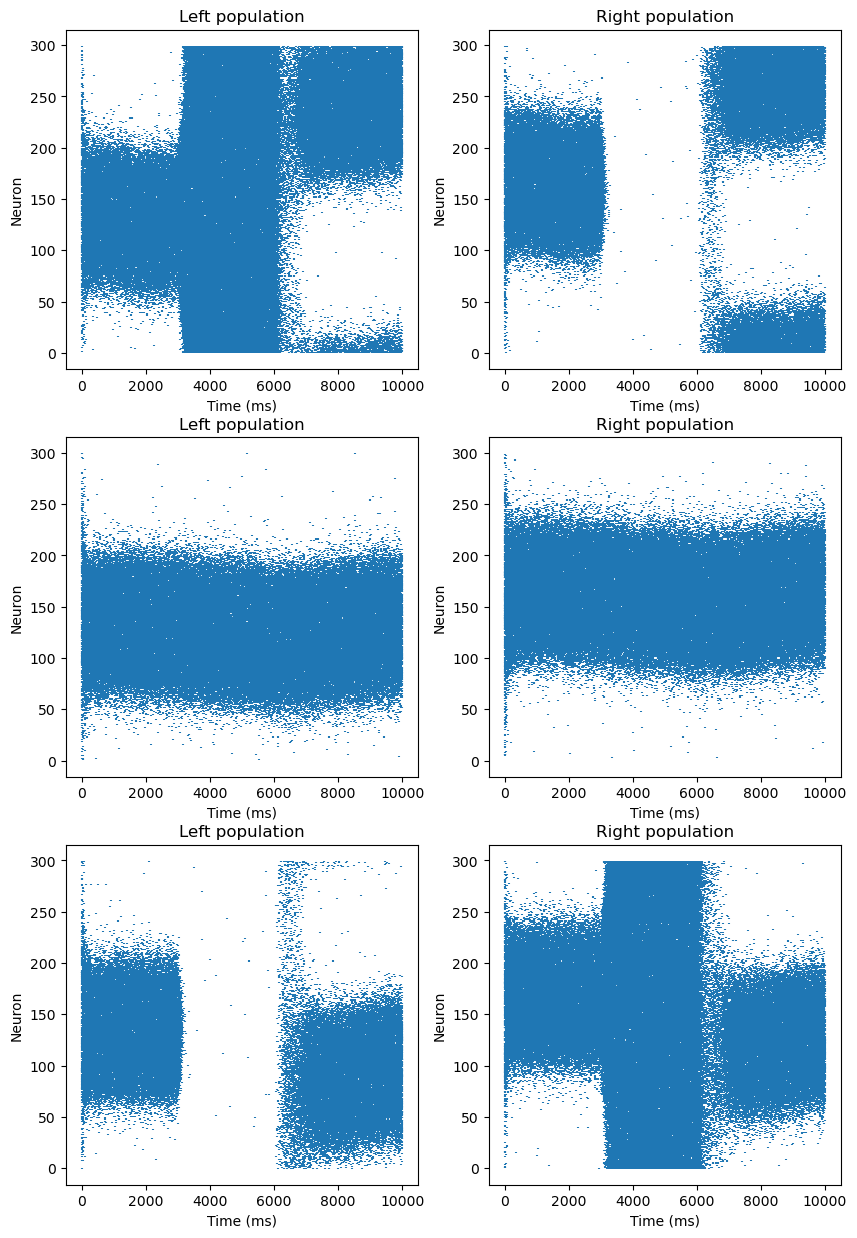

In [2]:
np.random.seed(0)

J = 3
theta = 20*np.pi/180
I0_values = np.linspace(-1.5, 1.5, 3)

fig, ax = plt.subplots(len(I0_values), 2, figsize=(10, 15))

for i, I0 in tqdm(enumerate(I0_values)):
    network = TwoPopulationSimulation(J = J, theta = theta, I0 = I0, I_ext = True)

    hL,sL, hR, sR = network.simulation(initial_voltage=network.centered_voltage)

    # s = bins_spike(s, 1)
    spike_timesL = [np.where(sL.T[i] !=0)[0] for i in range(ct.N)]
    spike_timesR = [np.where(sR.T[i] !=0)[0] for i in range(ct.N)]

    ax[i, 0].eventplot(spike_timesL, orientation='horizontal')
    ax[i, 1].eventplot(spike_timesR, orientation='horizontal')
    ax[i, 0].set_title(f'Left population')
    ax[i, 1].set_title(f'Right population')
    ax[i, 0].set_xlabel('Time (ms)')
    ax[i, 1].set_xlabel('Time (ms)')
    ax[i, 0].set_ylabel("Neuron")
    ax[i, 1].set_ylabel("Neuron")
    

plt.show()

In [3]:
np.random.seed(0)

J = 3
theta = 20*np.pi/180
I0_values = np.linspace(-1.5, 1.5, 51)

bump_L = []
bump_R = []

for i, I0 in tqdm(enumerate(I0_values)):
    network = TwoPopulationSimulation(J = J, theta = theta, I0 = I0, I_ext=True)

    hL,sL, hR, sR = network.simulation(initial_voltage=network.centered_voltage)

    sL = bins_spike(sL, 10)
    sR = bins_spike(sR, 10)
    
    bump_R.append(np.mean(get_bump(sR, N = ct.N)))
    bump_L.append(np.mean(get_bump(sL, N = ct.N)))


100%|██████████| 9999/9999 [00:05<00:00, 1813.78it/s]
51it [04:12,  4.95s/it]


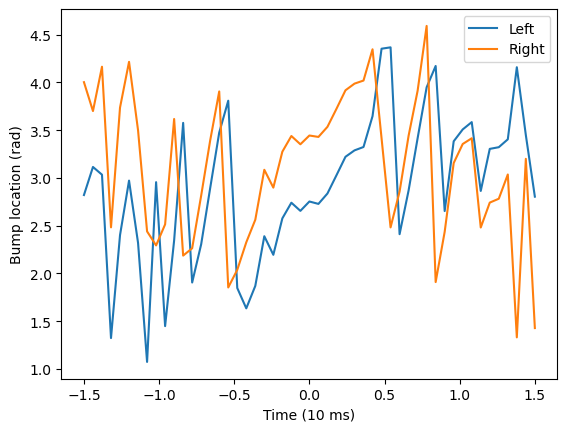

In [4]:
plt.plot(I0_values, bump_L, label='Left')
plt.plot(I0_values, bump_R, label='Right')
plt.legend()
plt.xlabel('Time (10 ms)')
plt.ylabel('Bump location (rad)')
plt.show()

Linear : between -0.5 nA and 0.5 nA.